In [1]:
import numpy as np
import nltk
from nltk import bigrams
from nltk.tokenize import SpaceTokenizer
import pandas as pd

In [2]:
# three example centences
sents = ["I enjoy flying", "I like flying", "I enjoy NLP", "I like NLP",  "I like deep_learning", "I like deep_learning"]

In [3]:
sent_list = [word for word in [sent.split() for sent in sents] ]

In [4]:
sent_list

[['I', 'enjoy', 'flying'],
 ['I', 'like', 'flying'],
 ['I', 'enjoy', 'NLP'],
 ['I', 'like', 'NLP'],
 ['I', 'like', 'deep_learning'],
 ['I', 'like', 'deep_learning']]

In [5]:
unique_words = []
for sent in sents:
    for w in sent.split():
        if w not in unique_words: 
            unique_words.append(w)
print(unique_words)

['I', 'enjoy', 'flying', 'like', 'NLP', 'deep_learning']


In [6]:
unique_words.index('like')

3

In [7]:
I = pd.Index(unique_words)
C = pd.Index(unique_words)
df = pd.DataFrame(data=np.zeros((len(unique_words), len(unique_words))), index=I, columns=C)

In [8]:
df

,I,enjoy,flying,like,NLP,deep_learning
I,0.0,0.0,0.0,0.0,0.0,0.0
enjoy,0.0,0.0,0.0,0.0,0.0,0.0
flying,0.0,0.0,0.0,0.0,0.0,0.0
like,0.0,0.0,0.0,0.0,0.0,0.0
NLP,0.0,0.0,0.0,0.0,0.0,0.0
deep_learning,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for w in unique_words:
    for sent in sent_list:
        if w in sent:
            print(w)
            if sent.index(w) < len(sent)-1:
                df.loc[w, sent[sent.index(w)+1]] = df.loc[w, sent[sent.index(w)+1]] + 1
            if sent.index(w) > 0:
                df.loc[w, sent[sent.index(w)-1]] = df.loc[w, sent[sent.index(w)-1]] + 1

I
I
I
I
I
I
enjoy
enjoy
flying
flying
like
like
like
like
NLP
NLP
deep_learning
deep_learning


In [10]:
df

,I,enjoy,flying,like,NLP,deep_learning
I,0.0,2.0,0.0,4.0,0.0,0.0
enjoy,2.0,0.0,1.0,0.0,1.0,0.0
flying,0.0,1.0,0.0,1.0,0.0,0.0
like,4.0,0.0,1.0,0.0,1.0,2.0
NLP,0.0,1.0,0.0,1.0,0.0,0.0
deep_learning,0.0,0.0,0.0,2.0,0.0,0.0


In [11]:
vecs = df.values

In [12]:
vecs

array([[0., 2., 0., 4., 0., 0.],
       [2., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [4., 0., 1., 0., 1., 2.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 2., 0., 0.]])

In [13]:
# Source https://towardsdatascience.com/using-fasttext-and-svd-to-visualise-word-embeddings-instantly-5b8fa870c3d1
# Carrying out Singular Value Decomposition
U, s, Vh = np.linalg.svd(vecs,full_matrices=False) 

In [17]:
np.set_printoptions(linewidth=115)
print(U)
print(U.shape)

[[ 0.00000000e+00  8.63662367e-01  8.48129504e-04 -6.39264905e-02 -4.89659376e-01 -1.01161730e-01]
 [-4.33188730e-01  3.50882943e-17 -9.01223923e-01 -1.19567740e-02  5.61825144e-17  5.88807660e-18]
 [ 1.01986142e-18  2.57749567e-01  5.68379256e-03 -4.28407347e-01  6.32723667e-01 -5.91321200e-01]
 [-9.01303236e-01 -4.08457138e-17  4.33150611e-01  5.74672267e-03  1.34272624e-18 -2.10163460e-18]
 [ 1.01986142e-18  2.57749567e-01  5.68379256e-03 -4.28407347e-01  3.46595085e-01  7.93644661e-01]
 [ 1.29379432e-18  3.48163233e-01 -1.05194556e-02  7.92888204e-01  4.89659376e-01  1.01161730e-01]]
(6, 6)


In [16]:
print(s)

[5.17747511e+00 5.17747511e+00 1.09258937e+00 1.09258937e+00 1.47032472e-16 2.16885055e-18]


In [19]:
s_diag = np.diag(s)
print(s_diag)

[[5.17747511e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.17747511e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.09258937e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.09258937e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.47032472e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.16885055e-18]]


### Reduce dimensionality by selecting the first k singular features
  * Reduce the text to 2 (k=2) dimentional word embedding

In [23]:
s_diag[:, :2]

array([[5.17747511, 0.        ],
       [0.        , 5.17747511],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [24]:
embeddings = np.dot(U, s_diag[:, :2])

In [25]:
print(embeddings)

[[ 0.00000000e+00  4.47159041e+00]
 [-2.24282387e+00  1.81668770e-16]
 [ 5.28030713e-18  1.33449197e+00]
 [-4.66647507e+00 -2.11477666e-16]
 [ 5.28030713e-18  1.33449197e+00]
 [ 6.69858789e-18  1.80260647e+00]]


In [26]:
print("Word Embedding for - \"enjoy\" - ", embeddings[1])
print("Word Embedding for - \"like\" - ", embeddings[3])

Word Embedding for - "enjoy" -  [-2.24282387e+00  1.81668770e-16]
Word Embedding for - "like" -  [-4.66647507e+00 -2.11477666e-16]


In [ ]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(embeddings[1].T, embeddings[3])/(norm(embeddings[1])*norm(embeddings[3]))
print(cos_sim)

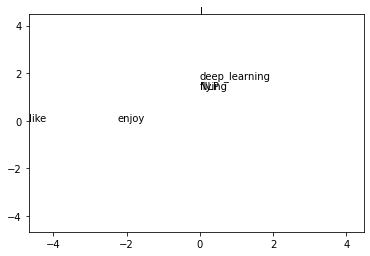

In [29]:
import matplotlib.pyplot as plt

# Plotting words and their vector representations

xmin = np.min(embeddings)
xmax = np.max(embeddings)

for i in range(len(embeddings)):
        fig = plt.gcf()
        #fig.set_size_inches(18.5, 10.5)
        plt.text(embeddings[i,0], embeddings[i,1], unique_words[i])
        plt.xlim((xmin,xmax))
        plt.ylim((xmin,xmax))
        
plt.show()